In [75]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# importing required libraries for Simple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [77]:
# 1 Onboarding the data & create the data frame
df = pd.read_csv(r'E:\Python\AI&ML\SourceData\Gaming_data.csv')

In [78]:
# 2 Exploratory Data Analysis (EDA)
# To see 1st five records of df
df.head()

,Steps,Points
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [79]:
# To see lsst five records of df
df.tail()

,Steps,Points
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [80]:
# To see the non-null count and data type of each column in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Steps   10 non-null     int64
 1   Points  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [81]:
# To see the dimension (r x c) of df
df.shape

(10, 2)

In [82]:
# To see the minimal statistical report of df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Steps,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Points,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


In [83]:
# To see the null values of df
df.isnull().sum()

Steps     0
Points    0
dtype: int64

In [84]:
# To see the no.of duplicated records of df
df.duplicated().sum()

np.int64(0)

In [85]:
# To see the columns of df
df.columns

Index(['Steps', 'Points'], dtype='object')

In [86]:
# 3 Defining x, y variables
X = df.drop('Points', axis=1)
Y = df['Points']

In [87]:
X

,Steps
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [88]:
Y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Points, dtype: int64

In [89]:
# Fitting Linear Regression to the df
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


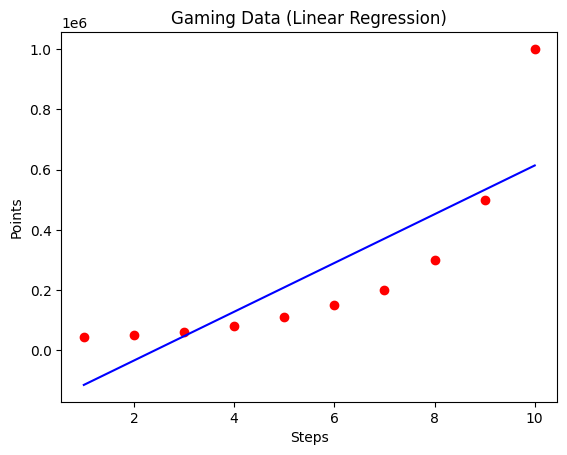

In [90]:
# Visualising Liner Regression results
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Gaming Data (Linear Regression)')
plt.xlabel('Steps')
plt.ylabel('Points')
plt.show()

In [97]:
# Fitting Polynomial Regression to df
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5) # Transforming tool (degrees from 2 to 7 max to best fit curve)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, Y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


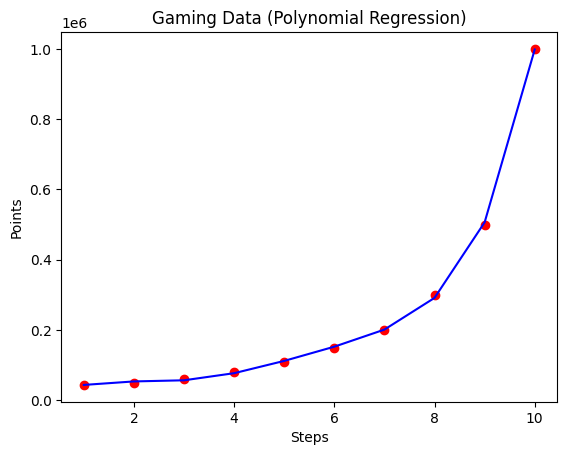

In [98]:
# Visualising Polynomial Regression results
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg2.predict(X_poly), color = 'blue')
plt.title('Gaming Data (Polynomial Regression)')
plt.xlabel('Steps')
plt.ylabel('Points')
plt.show()

In [99]:
# To Predict Target Values
y_pred = lin_reg2.predict(X_poly)

df1 = pd.DataFrame({'Y_Act': Y, 'Y_Pred': y_pred})
df1

,Y_Act,Y_Pred
0,45000,43895.104896
1,50000,53836.829837
2,60000,57065.268066
3,80000,77286.713287
4,110000,112263.403264
5,150000,152736.596737
6,200000,201349.650350
7,300000,291571.095571
8,500000,506617.715617
9,1000000,998377.622376


In [100]:
# Calculate R²-Score
r2 = r2_score(Y, y_pred)
print("R² Score:", r2)

R² Score: 0.9997969027099755


In [101]:
# estimating future points for given game points

Y_future = np.array([[11], [12]])
Y_future_poly = poly_reg.fit_transform(Y_future)

future_predictions = lin_reg2.predict(Y_future_poly)
print(future_predictions)

[2006333.33332936 3876484.84847668]
